In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

0.9999999841442331
[2.52794578e-04 3.74594764e-04 5.50072828e-04 8.00054254e-04
 1.15228549e-03 1.64322592e-03 2.32011942e-03 3.24331859e-03
 4.48880225e-03 6.15078697e-03 8.34428506e-03 1.12074098e-02
 1.49031736e-02 1.96204744e-02 2.55739258e-02 3.30021635e-02
 4.21642627e-02 5.33339420e-02 6.67913043e-02 8.28119911e-02
 1.01653793e-01 1.23540970e-01 1.48646773e-01 1.77074905e-01
 2.08840923e-01 2.43854766e-01 2.81905757e-01 3.22651507e-01
 3.65612055e-01 4.10170450e-01 4.55580669e-01 5.00983314e-01
 5.45429082e-01 5.87909361e-01 6.27392779e-01 6.62865951e-01
 6.93376253e-01 7.18074115e-01 7.36252250e-01 7.47379280e-01
 7.51125536e-01 7.47379284e-01 7.36252259e-01 7.18074127e-01
 6.93376269e-01 6.62865971e-01 6.27392800e-01 5.87909384e-01
 5.45429109e-01 5.00983344e-01 4.55580701e-01 4.10170483e-01
 3.65612087e-01 3.22651539e-01 2.81905787e-01 2.43854793e-01
 2.08840949e-01 1.77074928e-01 1.48646795e-01 1.23540992e-01
 1.01653815e-01 8.28120143e-02 6.67913302e-02 5.33339725e-02
 4.21

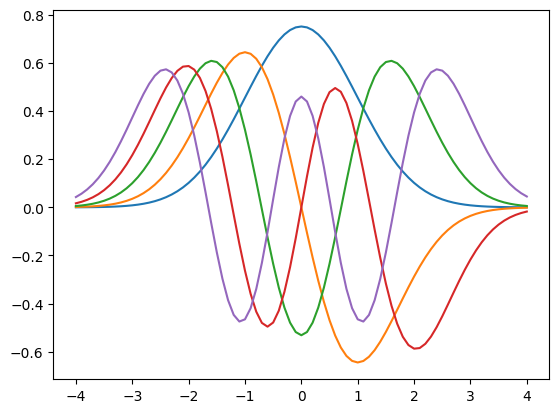

In [6]:
def bvp(y, x, k, epsilon_n):
    return [y[1], (k*x**2 - epsilon_n)*y[0]]

L = 4
K = 1
xspan = np.arange(-L, L + 0.1, 0.1)
epsilon_start = 0.2
tol = 1e-4
A1 = []
A2 = []

for mode in range(1,6):
    epsilon_n = epsilon_start
    y0 = [1, np.sqrt(L**2 - epsilon_n)]
    depsilon = 0.1
    for _ in range(1000):
        y = odeint(bvp, y0, xspan, args = (K, epsilon_n))
        temp = y[-1, 1] + np.sqrt(L**2 - epsilon_n) * y[-1, 0]

        if abs(temp) < tol:
            print(epsilon_n)
            A2.append(epsilon_n)
            break

        if (-1)**(mode + 1) * temp > 0:
            epsilon_n += depsilon
        else:
            epsilon_n -= depsilon / 2
            depsilon /= 2

    epsilon_start = epsilon_n + 0.5

    norm = y[:,0] / np.sqrt(np.trapz(y[:,0]**2, xspan))
    A1.append(norm)
    plt.plot(xspan, norm)
    print(norm, epsilon_n)

A2 = np.array(A2)
A1 = np.array(A1).T
A1 = abs(A1)



In [7]:
A1

array([[2.52794578e-04, 1.41399484e-03, 5.48040535e-03, 1.67562407e-02,
        4.27235247e-02],
       [3.74594764e-04, 2.05479699e-03, 7.74921977e-03, 2.30011831e-02,
        5.67638095e-02],
       [5.50072828e-04, 2.94809699e-03, 1.08126659e-02, 3.11385568e-02,
        7.43280905e-02],
       [8.00054254e-04, 4.18059822e-03, 1.49005557e-02, 4.15958321e-02,
        9.59309647e-02],
       [1.15228549e-03, 5.86228395e-03, 2.02871393e-02, 5.48375533e-02,
        1.22023229e-01],
       [1.64322592e-03, 8.13045602e-03, 2.72922510e-02, 7.13469822e-02,
        1.52931932e-01],
       [2.32011942e-03, 1.11535745e-02, 3.62791916e-02, 9.15983534e-02,
        1.88788628e-01],
       [3.24331859e-03, 1.51345033e-02, 4.76481884e-02, 1.16018784e-01,
        2.29449162e-01],
       [4.48880225e-03, 2.03126510e-02, 6.18242427e-02, 1.44939653e-01,
        2.74410729e-01],
       [6.15078697e-03, 2.69643803e-02, 7.92382716e-02, 1.78538390e-01,
        3.22734352e-01],
       [8.34428506e-03, 3.5400

In [5]:
A1, A2[:5]

(array([[2.52794578e-04, 1.41399484e-03, 5.48040535e-03, 1.67562407e-02,
         4.27235247e-02],
        [3.74594764e-04, 2.05479699e-03, 7.74921977e-03, 2.30011831e-02,
         5.67638095e-02],
        [5.50072828e-04, 2.94809699e-03, 1.08126659e-02, 3.11385568e-02,
         7.43280905e-02],
        [8.00054254e-04, 4.18059822e-03, 1.49005557e-02, 4.15958321e-02,
         9.59309647e-02],
        [1.15228549e-03, 5.86228395e-03, 2.02871393e-02, 5.48375533e-02,
         1.22023229e-01],
        [1.64322592e-03, 8.13045602e-03, 2.72922510e-02, 7.13469822e-02,
         1.52931932e-01],
        [2.32011942e-03, 1.11535745e-02, 3.62791916e-02, 9.15983534e-02,
         1.88788628e-01],
        [3.24331859e-03, 1.51345033e-02, 4.76481884e-02, 1.16018784e-01,
         2.29449162e-01],
        [4.48880225e-03, 2.03126510e-02, 6.18242427e-02, 1.44939653e-01,
         2.74410729e-01],
        [6.15078697e-03, 2.69643803e-02, 7.92382716e-02, 1.78538390e-01,
         3.22734352e-01],
        [8